In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime, timedelta

import warnings
warnings.filterwarnings('ignore')

### Data Understanding

**Reading Dataset**

In [5]:
ipl_matches = pd.read_csv('ipl_matches.csv')

In [7]:
ipl_matches_copy = ipl_matches.copy()

**Load First 5 Records**

In [10]:
ipl_matches_copy.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


**Shape of Dataset (No of Rows and Columns):**

In [13]:
ipl_matches_copy.shape

(756, 18)

**Information of the Dataset**

In [16]:
ipl_matches_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

**Description of the Dataset**

In [19]:
ipl_matches_copy.describe()

,id,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,0.025132,13.283069,3.350529
std,3464.478148,0.156630,23.471144,3.387963
min,1.000000,0.000000,0.000000,0.000000
25%,189.750000,0.000000,0.000000,0.000000
50%,378.500000,0.000000,0.000000,4.000000
75%,567.250000,0.000000,19.000000,6.000000
max,11415.000000,1.000000,146.000000,10.000000


In [21]:
# Check for missing values
print(ipl_matches_copy.isnull().sum())

id                   0
Season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64


In [23]:
# Check the percentage of missing data for each column
print((ipl_matches_copy.isnull().sum() / len(ipl_matches_copy)) * 100)

id                  0.000000
Season              0.000000
city                0.925926
date                0.000000
team1               0.000000
team2               0.000000
toss_winner         0.000000
toss_decision       0.000000
result              0.000000
dl_applied          0.000000
winner              0.529101
win_by_runs         0.000000
win_by_wickets      0.000000
player_of_match     0.529101
venue               0.000000
umpire1             0.264550
umpire2             0.264550
umpire3            84.259259
dtype: float64


In [25]:
#Drop columns with too many missing values (for example, more than 60%)
ipl_matches_copy = ipl_matches_copy.dropna(axis=1, thresh=int(0.4*len(ipl_matches_copy)))

# Check again for missing values
print(ipl_matches_copy.isnull().sum())

id                 0
Season             0
city               7
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             4
win_by_runs        0
win_by_wickets     0
player_of_match    4
venue              0
umpire1            2
umpire2            2
dtype: int64


In [27]:
missing_rows_umpire1 = ipl_matches_copy[ipl_matches_copy['umpire1'].isnull()]
print(missing_rows_umpire1['umpire1'])

4      NaN
753    NaN
Name: umpire1, dtype: object


In [29]:
missing_rows_umpire2 = ipl_matches_copy[ipl_matches_copy['umpire2'].isnull()]
print(missing_rows_umpire2['umpire2'])

4      NaN
753    NaN
Name: umpire2, dtype: object


In [31]:
#Filling index 4 with values from index 3
ipl_matches_copy.loc[4, ['umpire1', 'umpire2']] = ipl_matches_copy.loc[3, ['umpire1', 'umpire2']]

#Filling index 753 with values from index 754
ipl_matches_copy.loc[753, ['umpire1', 'umpire2']] = ipl_matches_copy.loc[754, ['umpire1', 'umpire2']]

print(ipl_matches_copy.loc[[4, 753], ['umpire1', 'umpire2']])

           umpire1         umpire2
4     AK Chaudhary   C Shamshuddin
753  Sundaram Ravi  Bruce Oxenford


In [33]:
# Check again for missing values
print(ipl_matches_copy.isnull().sum())

id                 0
Season             0
city               7
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             4
win_by_runs        0
win_by_wickets     0
player_of_match    4
venue              0
umpire1            0
umpire2            0
dtype: int64


In [35]:
# Check again for missing values
ipl_matches_copy['city'].value_counts()

city
Mumbai            101
Kolkata            77
Delhi              74
Bangalore          66
Hyderabad          64
Chennai            57
Jaipur             47
Chandigarh         46
Pune               38
Durban             15
Bengaluru          14
Visakhapatnam      13
Centurion          12
Ahmedabad          12
Rajkot             10
Mohali             10
Indore              9
Dharamsala          9
Johannesburg        8
Cuttack             7
Ranchi              7
Port Elizabeth      7
Cape Town           7
Abu Dhabi           7
Sharjah             6
Raipur              6
Kochi               5
Kanpur              4
Nagpur              3
Kimberley           3
East London         3
Bloemfontein        2
Name: count, dtype: int64

In [37]:
missing_rows = ipl_matches_copy[ipl_matches_copy['city'].isnull()]
print(missing_rows['city'])

461    NaN
462    NaN
466    NaN
468    NaN
469    NaN
474    NaN
476    NaN
Name: city, dtype: object


In [39]:
# Replace 'NaN' in the 'City' column with 'dubai'
ipl_matches_copy['city'] = ipl_matches_copy['city'].fillna('Dubai')

In [41]:
missing_rows = ipl_matches_copy[ipl_matches_copy['city'].isnull()]
print(missing_rows['city'])

Series([], Name: city, dtype: object)


In [43]:
# Check again for missing values
print(ipl_matches_copy.isnull().sum())

id                 0
Season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             4
win_by_runs        0
win_by_wickets     0
player_of_match    4
venue              0
umpire1            0
umpire2            0
dtype: int64


In [45]:
ipl_matches_copy['result'].value_counts()

result
normal       743
tie            9
no result      4
Name: count, dtype: int64

In [47]:
# Replace 'NaN' in the 'winner' and 'player_of_match' column with 'no result' as match was abandoned due to heavy downpour
ipl_matches_copy['winner'] = ipl_matches_copy['winner'].fillna('no result')
ipl_matches_copy['player_of_match'] = ipl_matches_copy['player_of_match'].fillna('no result')

In [49]:
print(ipl_matches_copy.isnull().sum())

id                 0
Season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            0
dtype: int64


In [51]:
ipl_matches_copy['team1'].value_counts()

team1
Mumbai Indians                 101
Kings XI Punjab                 91
Chennai Super Kings             89
Royal Challengers Bangalore     85
Kolkata Knight Riders           83
Delhi Daredevils                72
Rajasthan Royals                67
Sunrisers Hyderabad             63
Deccan Chargers                 43
Pune Warriors                   20
Gujarat Lions                   14
Rising Pune Supergiant           8
Kochi Tuskers Kerala             7
Rising Pune Supergiants          7
Delhi Capitals                   6
Name: count, dtype: int64

In [53]:
ipl_matches_copy['team2'].value_counts()

team2
Royal Challengers Bangalore    95
Kolkata Knight Riders          95
Delhi Daredevils               89
Mumbai Indians                 86
Kings XI Punjab                85
Rajasthan Royals               80
Chennai Super Kings            75
Sunrisers Hyderabad            45
Deccan Chargers                32
Pune Warriors                  26
Gujarat Lions                  16
Delhi Capitals                 10
Rising Pune Supergiant          8
Kochi Tuskers Kerala            7
Rising Pune Supergiants         7
Name: count, dtype: int64

In [55]:
ipl_matches_copy.replace('Rising Pune Supergiants', 'Rising Pune Supergiant', inplace=True)

In [57]:
ipl_matches_copy.replace('Delhi Daredevils','Delhi Capitals',inplace=True)

In [59]:
ipl_matches_copy['team1'].value_counts()

team1
Mumbai Indians                 101
Kings XI Punjab                 91
Chennai Super Kings             89
Royal Challengers Bangalore     85
Kolkata Knight Riders           83
Delhi Capitals                  78
Rajasthan Royals                67
Sunrisers Hyderabad             63
Deccan Chargers                 43
Pune Warriors                   20
Rising Pune Supergiant          15
Gujarat Lions                   14
Kochi Tuskers Kerala             7
Name: count, dtype: int64

In [61]:
ipl_matches_copy['team2'].value_counts()

team2
Delhi Capitals                 99
Royal Challengers Bangalore    95
Kolkata Knight Riders          95
Mumbai Indians                 86
Kings XI Punjab                85
Rajasthan Royals               80
Chennai Super Kings            75
Sunrisers Hyderabad            45
Deccan Chargers                32
Pune Warriors                  26
Gujarat Lions                  16
Rising Pune Supergiant         15
Kochi Tuskers Kerala            7
Name: count, dtype: int64

In [63]:
ipl_matches_copy.head(20)

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,AK Chaudhary,C Shamshuddin
5,6,IPL-2017,Hyderabad,09-04-2017,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong
6,7,IPL-2017,Mumbai,09-04-2017,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan
7,8,IPL-2017,Indore,10-04-2017,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
8,9,IPL-2017,Pune,11-04-2017,Delhi Capitals,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Delhi Capitals,97,0,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi
9,10,IPL-2017,Mumbai,12-04-2017,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan


In [65]:
ipl_matches_copy.dtypes

id                  int64
Season             object
city               object
date               object
team1              object
team2              object
toss_winner        object
toss_decision      object
result             object
dl_applied          int64
winner             object
win_by_runs         int64
win_by_wickets      int64
player_of_match    object
venue              object
umpire1            object
umpire2            object
dtype: object

In [67]:
ipl_matches_copy['date'].value_counts()

date
17-04-2011    2
07-04-2012    2
05-05-2011    2
14-05-2016    2
07-05-2011    2
             ..
13-04-2012    1
11-04-2012    1
09-04-2012    1
05-04-2012    1
12-05-2019    1
Name: count, Length: 546, dtype: int64

In [69]:
# Converting date to pandas datetime format
ipl_matches_copy['date'] = pd.to_datetime(ipl_matches_copy['date'], dayfirst=True)

In [71]:
ipl_matches_copy.dtypes

id                          int64
Season                     object
city                       object
date               datetime64[ns]
team1                      object
team2                      object
toss_winner                object
toss_decision              object
result                     object
dl_applied                  int64
winner                     object
win_by_runs                 int64
win_by_wickets              int64
player_of_match            object
venue                      object
umpire1                    object
umpire2                    object
dtype: object

In [73]:
#Featured Engineering :
# ipl_matches_copy['month']=ipl_matches_copy['date'].dt.month_name()
ipl_matches_copy['year']=ipl_matches_copy['date'].dt.year
# ipl_matches_copy['date']=ipl_matches_copy['date'].dt.date
# ipl_matches_copy['day']=ipl_matches_copy['date'].dt.day_name()
# ipl_matches_copy['hour']=ipl_matches_copy['date'].dt.hour

In [75]:
ipl_matches_copy.head(2)

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,year
0,1,IPL-2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,2017
1,2,IPL-2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,2017


In [77]:
ipl_matches_copy['Season'].value_counts()

Season
IPL-2013    76
IPL-2012    74
IPL-2011    73
IPL-2010    60
IPL-2014    60
IPL-2016    60
IPL-2018    60
IPL-2019    60
IPL-2017    59
IPL-2015    59
IPL-2008    58
IPL-2009    57
Name: count, dtype: int64

In [79]:
ipl_matches_copy.head(2)

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,year
0,1,IPL-2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,2017
1,2,IPL-2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,2017


### Data Visualization

**Total Matches by Season**

In [83]:
match_per_season =  ipl_matches_copy.groupby(['Season'])['id'].count().reset_index().rename(columns={'id':'matches'})
match_per_season.sort_values(by='matches',ascending=False)

,Season,matches
5,IPL-2013,76
4,IPL-2012,74
3,IPL-2011,73
2,IPL-2010,60
6,IPL-2014,60
8,IPL-2016,60
10,IPL-2018,60
11,IPL-2019,60
7,IPL-2015,59
9,IPL-2017,59


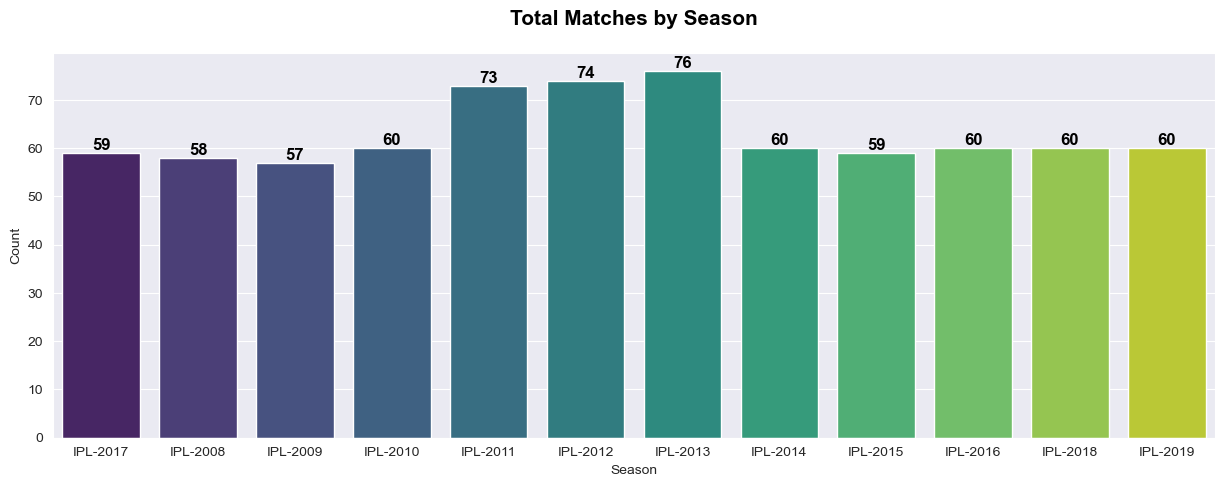

In [85]:
plt.figure(figsize=(15,5))
sns.set_style(style='darkgrid')
total_matches=sns.countplot(x=ipl_matches_copy['Season'],palette='viridis')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Season', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Total Matches by Season', fontsize=15, pad=20, color='k',fontweight = 'bold')

#Adding labels of text:
for i in total_matches.containers:
    total_matches.bar_label(i,label_type='edge',fontsize=12,fontweight='bold',color='black')

plt.show()

**Toss Winners**

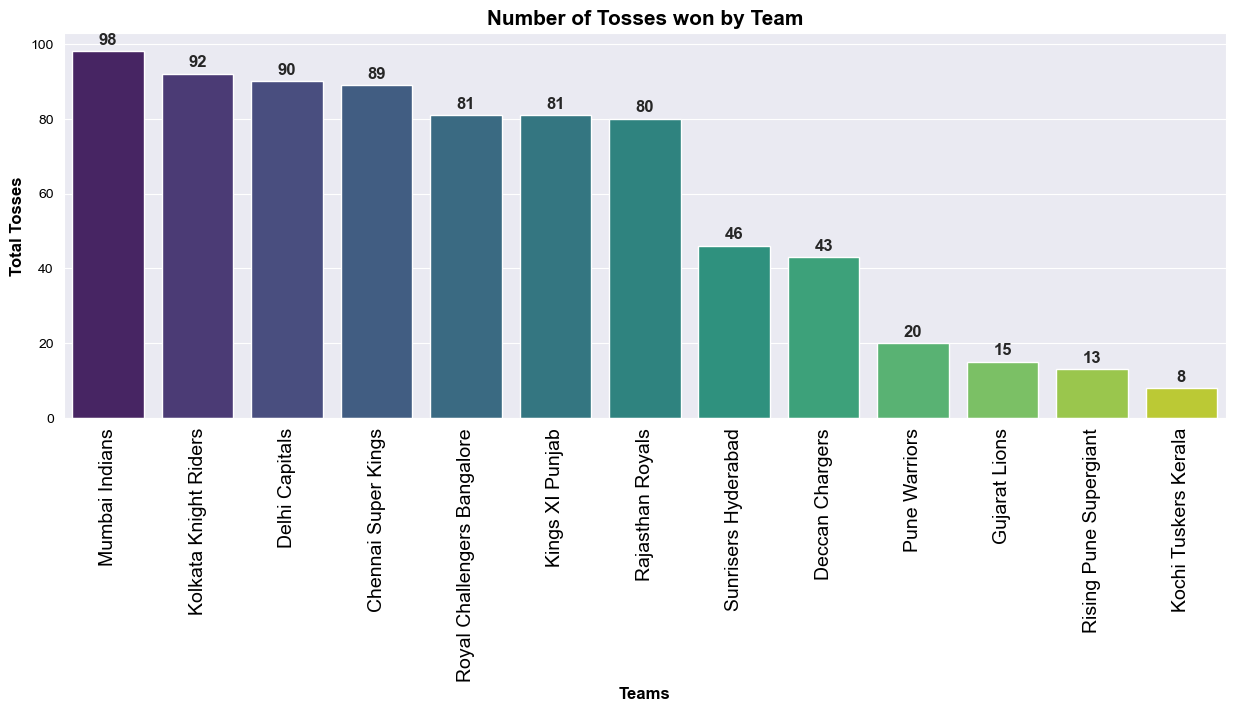

In [87]:
toss_winner=ipl_matches_copy['toss_winner'].value_counts()

sns.set_style(style='darkgrid')
plt.figure(figsize=(15,5),frameon=False)
bars=sns.barplot(x=toss_winner.index,y=toss_winner.values,palette='viridis')
# bars=plt.bar(toss_winner.index,toss_winner.values,palette='viridis',edgecolor='k',lw=2,width=0.6)

plt.xticks(rotation=90,color='k',fontsize=14)
plt.yticks(color='k')
plt.xlabel('Teams', fontsize=12, fontweight='bold',color='k')
plt.ylabel('Total Tosses', fontsize=12, fontweight='bold',color='k')
plt.title('Number of Tosses won by Team',fontsize=15, fontweight='bold',color='k')

for bar in bars.patches:
    height=bar.get_height()
    plt.text(
        bar.get_x()+bar.get_width()/2,  #x
        height+1,                       #y
        f'{int(height):,}',            #s
        ha='center',va='bottom', fontweight='bold',fontsize=12
    )

plt.show()

**Toss Decisions**

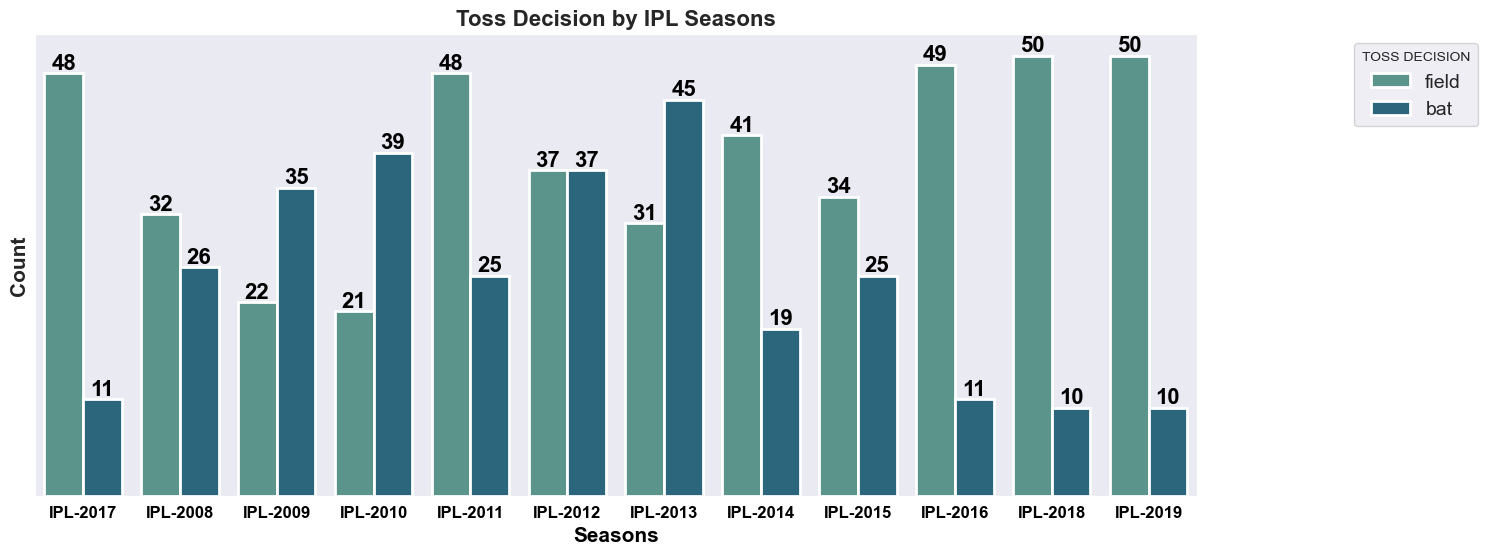

In [91]:
plt.figure(figsize=(15,6), facecolor='green', frameon=False)  #facecolor(color of frame) visible only when frameon=True(by default , its true)

sns.set_style(style='darkgrid')  #set bg color - dark and white


prod_cat=sns.countplot(
    data=ipl_matches_copy,
    x='Season',
    hue='toss_decision',
    palette='crest',
    edgecolor='white',
    lw=2
)

plt.xlabel('Seasons',fontsize=15,fontweight='bold',color='k')
plt.ylabel('Count',fontsize=15,fontweight='bold')
plt.title('Toss Decision by IPL Seasons',fontsize=16,fontweight='bold' )
plt.xticks(color='k',fontsize=12,fontweight='bold')
plt.yticks([])

#Adding labels of text:
for i in prod_cat.containers:
    prod_cat.bar_label(i,label_type='edge',fontsize=16,fontweight='bold',color='k')

plt.legend(title='TOSS DECISION',loc='upper right', fontsize=14,bbox_to_anchor=(1.25, 1), frameon=True)
plt.show()

**Distribution of Match Results**

In [94]:
ipl_matches_copy['result'].value_counts()

result
normal       743
tie            9
no result      4
Name: count, dtype: int64

**Total Matches by Venues**

In [97]:
#Total Matches at Venues
venue_total = ipl_matches_copy['venue'].value_counts().reset_index()
# venue_total
venue_total.columns = ['venue', 'total_matches']
venue_total

,venue,total_matches
0,Eden Gardens,77
1,M Chinnaswamy Stadium,73
2,Wankhede Stadium,73
3,Feroz Shah Kotla,67
4,"Rajiv Gandhi International Stadium, Uppal",56
5,"MA Chidambaram Stadium, Chepauk",49
6,Sawai Mansingh Stadium,47
7,"Punjab Cricket Association Stadium, Mohali",35
8,Maharashtra Cricket Association Stadium,21
9,Subrata Roy Sahara Stadium,17


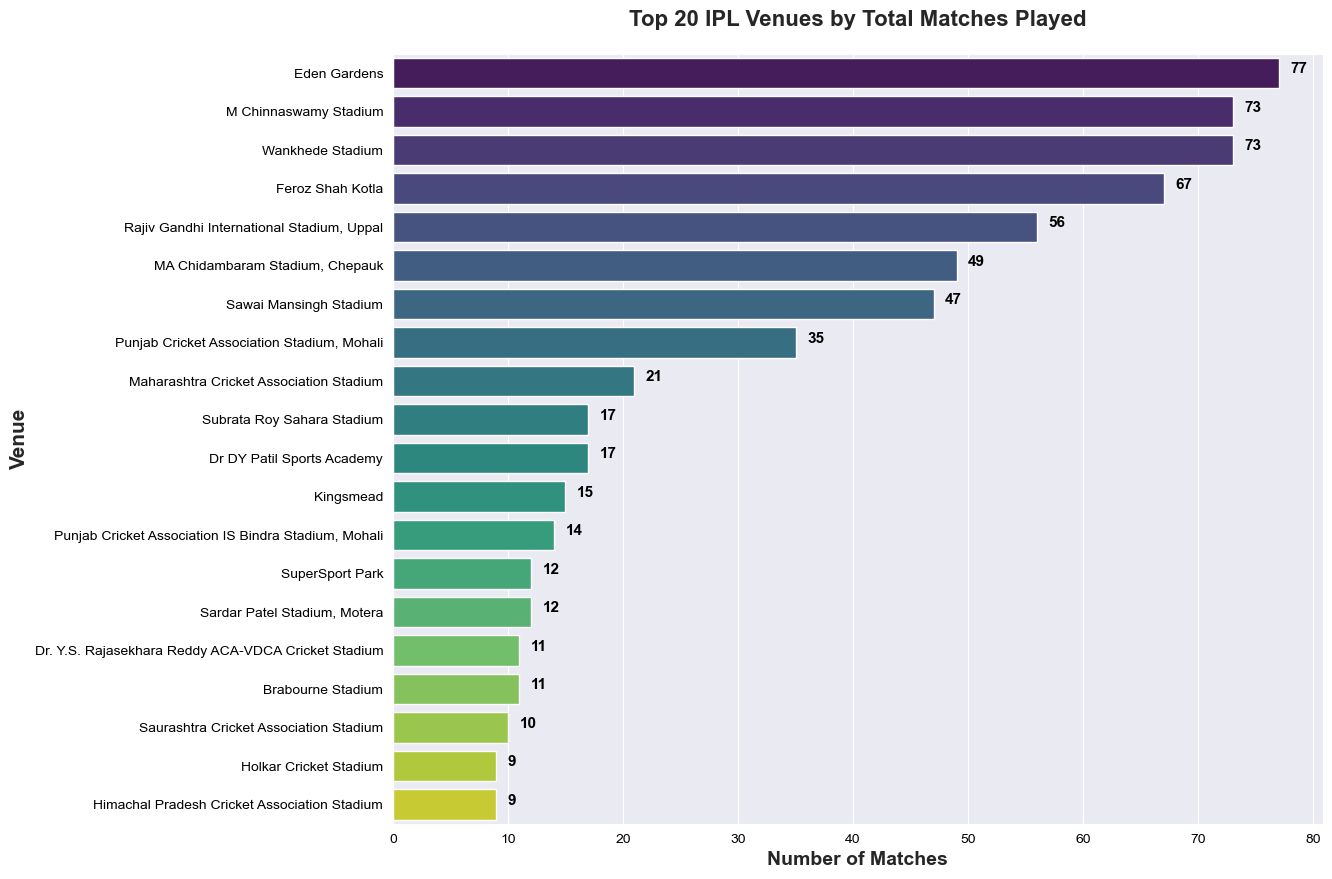

In [99]:
sns.set_style("darkgrid")
plt.figure(figsize=(12, 10))

# Create a bar plot for the top 20 venues
# venue_total is already sorted by value_counts() from your previous step
plot=sns.barplot(data=venue_total.head(20), 
            x='total_matches', 
            y='venue', 
            palette='viridis')

# Add titles and labels
plt.xticks(color='black')
plt.yticks(color='black')
plt.title('Top 20 IPL Venues by Total Matches Played', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Number of Matches', fontsize=14, fontweight='bold')
plt.ylabel('Venue', fontsize=15, fontweight='bold')


for p in plot.patches:
    width = p.get_width()
    # Add the text label
    plot.text(width + 1,       
            p.get_y() + p.get_height() / 2,
            f'{int(width)}', 
            color='black',   
            fontsize=11,    
            fontweight='bold',
            )

plt.show()

In [100]:
ipl_matches_copy.columns

Index(['id', 'Season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'year'],
      dtype='object')

In [103]:
# Calculate matches won by runs (batting first) at each venue
matches_won_by_runs_df = ipl_matches_copy[ipl_matches_copy['win_by_runs'] > 0]
# matches_won_by_runs_df

venue_matches_won_by_runs = matches_won_by_runs_df['venue'].value_counts().reset_index()
# venue_matches_won_by_runs
venue_matches_won_by_runs.columns = ['venue', 'wins_by_runs']

# Merge the data and calculate the Win Percentage
venue_win_by_runs = pd.merge(venue_total, venue_matches_won_by_runs, on='venue', how='left').fillna(0)
venue_win_by_runs['wins_by_runs'] = venue_win_by_runs['wins_by_runs'].astype(int)
# venue_win_by_runs

# Calculating the Win Percentage
venue_win_by_runs['wins_by_runs_%'] = ((venue_win_by_runs['wins_by_runs'] / venue_win_by_runs['total_matches']) * 100).round(2)

# venues with at least 10 matches won
significant_venues_by_runs = venue_win_by_runs[venue_win_by_runs['total_matches'] >= 10].sort_values(by='wins_by_runs_%', ascending=False)

# Display Top 10 (Win by Runs)
significant_venues_by_runs[['venue', 'total_matches', 'wins_by_runs', 'wins_by_runs_%']].head(10)

,venue,total_matches,wins_by_runs,wins_by_runs_%
9,Subrata Roy Sahara Stadium,17,11,64.71
15,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,11,7,63.64
5,"MA Chidambaram Stadium, Chepauk",49,30,61.22
11,Kingsmead,15,9,60.00
16,Brabourne Stadium,11,6,54.55
14,"Sardar Patel Stadium, Motera",12,6,50.00
12,"Punjab Cricket Association IS Bindra Stadium, ...",14,7,50.00
3,Feroz Shah Kotla,67,33,49.25
2,Wankhede Stadium,73,35,47.95
7,"Punjab Cricket Association Stadium, Mohali",35,15,42.86


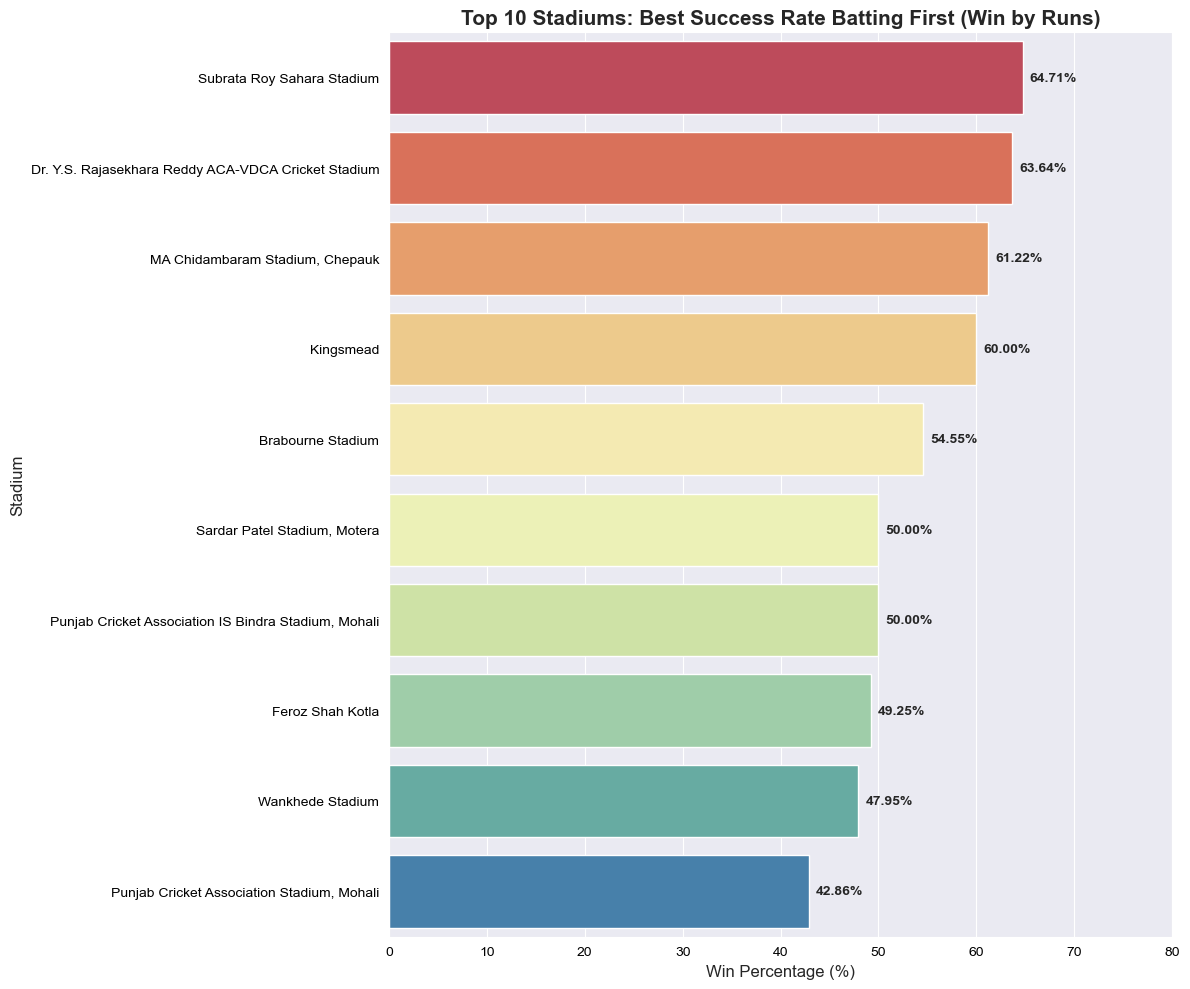

In [105]:
sns.set_style("darkgrid")
plt.figure(figsize=(12, 10))

plot = sns.barplot(
    data=significant_venues_by_runs.head(10), 
    x='wins_by_runs_%', 
    y='venue', 
    palette='Spectral'
)

# Add value labels to the end of each bar for clarity
for i in plot.containers:
    plot.bar_label(i, fmt='%.2f%%', padding=5, fontweight='bold')

# Titles and Labels
plt.xticks(color='black')
plt.yticks(color='black')
plt.title('Top 10 Stadiums: Best Success Rate Batting First (Win by Runs)', fontsize=15, fontweight='bold')
plt.xlabel('Win Percentage (%)', fontsize=12)
plt.ylabel('Stadium', fontsize=12)

# Adjust layout and show
plt.xlim(0, 80) 
plt.tight_layout()
plt.show()

In [106]:
# Calculate matches won by runs (batting first) at each venue
matches_won_by_wickets_df = ipl_matches_copy[ipl_matches_copy['win_by_wickets'] > 0]
# matches_won_by_runs_df

venue_matches_won_by_wickets = matches_won_by_wickets_df['venue'].value_counts().reset_index()
# venue_matches_won_by_wickets
venue_matches_won_by_wickets.columns = ['venue', 'win_by_wickets']

# Merge the data and calculate the Win Percentage
venue_win_by_wickets = pd.merge(venue_total, venue_matches_won_by_wickets, on='venue', how='left').fillna(0)
venue_win_by_wickets['win_by_wickets'] = venue_win_by_wickets['win_by_wickets'].astype(int)
# venue_win_by_wickets

# Calculating the Win Percentage
venue_win_by_wickets['win_by_wickets_%'] = ((venue_win_by_wickets['win_by_wickets'] / venue_win_by_wickets['total_matches']) * 100).round(2)

# venues with at least 10 matches won
significant_venues_by_wickets = venue_win_by_wickets[venue_win_by_wickets['total_matches'] >= 10].sort_values(by='win_by_wickets_%', ascending=False)

# Display Top 10 (Win by Wickets)
significant_venues_by_wickets[['venue', 'total_matches', 'win_by_wickets', 'win_by_wickets_%']].head(10)

,venue,total_matches,win_by_wickets,win_by_wickets_%
6,Sawai Mansingh Stadium,47,32,68.09
13,SuperSport Park,12,8,66.67
8,Maharashtra Cricket Association Stadium,21,14,66.67
17,Saurashtra Cricket Association Stadium,10,6,60.00
10,Dr DY Patil Sports Academy,17,10,58.82
0,Eden Gardens,77,45,58.44
7,"Punjab Cricket Association Stadium, Mohali",35,20,57.14
4,"Rajiv Gandhi International Stadium, Uppal",56,32,57.14
1,M Chinnaswamy Stadium,73,40,54.79
2,Wankhede Stadium,73,37,50.68


In [108]:
ipl_matches_copy.columns

Index(['id', 'Season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'year'],
      dtype='object')

In [111]:
# 1. Filter for matches won by runs
won_by_runs_df = ipl_matches_copy[ipl_matches_copy['win_by_runs'] > 0]

# 2. Group by winner and count wins
team_runs_wins = won_by_runs_df['winner'].value_counts().reset_index()
team_runs_wins.columns = ['team', 'count_of_wins_by_runs']
team_runs_wins


,team,count_of_wins_by_runs
0,Mumbai Indians,57
1,Chennai Super Kings,52
2,Kings XI Punjab,38
3,Kolkata Knight Riders,36
4,Royal Challengers Bangalore,35
5,Sunrisers Hyderabad,30
6,Delhi Capitals,28
7,Rajasthan Royals,27
8,Deccan Chargers,18
9,Rising Pune Supergiant,7


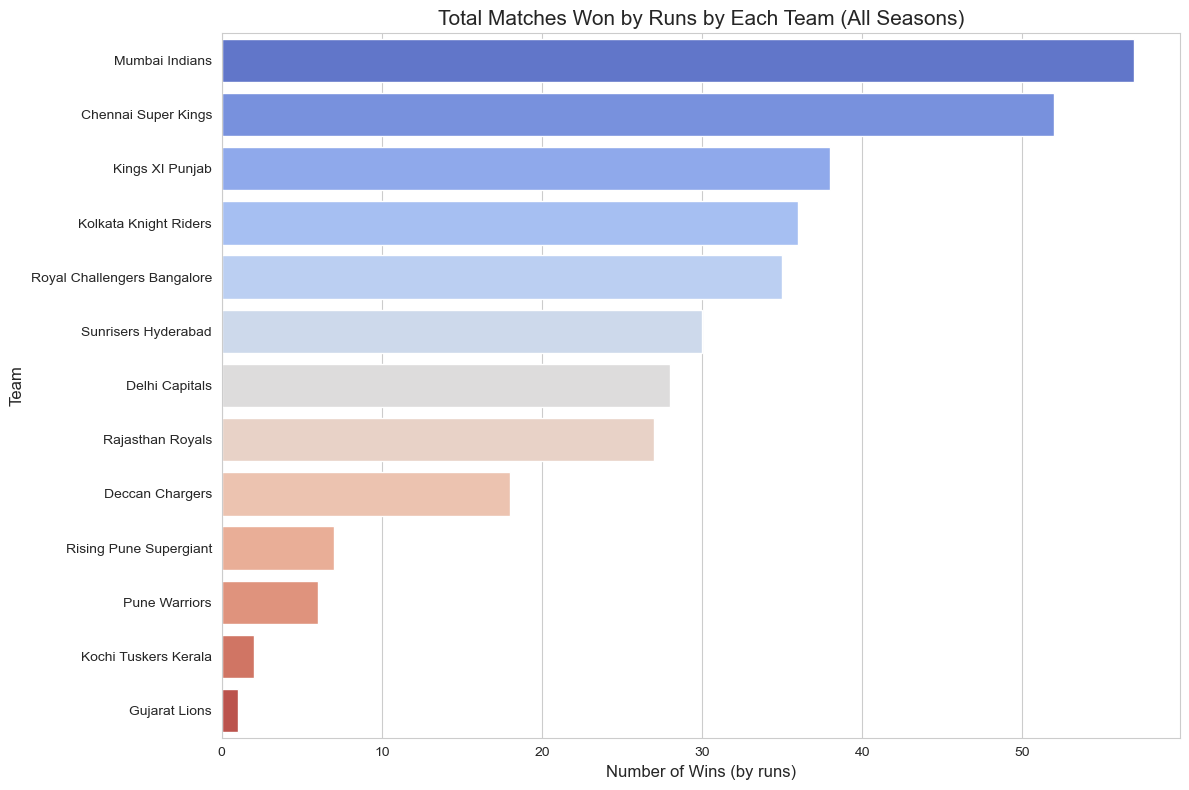

In [113]:
# 3. Visualization
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
sns.barplot(data=team_runs_wins, x='count_of_wins_by_runs', y='team', palette='coolwarm')

plt.title('Total Matches Won by Runs by Each Team (All Seasons)', fontsize=15)
plt.xlabel('Number of Wins (by runs)', fontsize=12)
plt.ylabel('Team', fontsize=12)
plt.tight_layout()
plt.show()

In [114]:
# 1. Filter for matches won by runs
won_by_wickets_df = ipl_matches_copy[ipl_matches_copy['win_by_wickets'] > 0]

# 2. Group by winner and count wins
team_wickets_wins = won_by_wickets_df['winner'].value_counts().reset_index()
team_wickets_wins.columns = ['team', 'count_of_wins_by_wickets']
team_wickets_wins


,team,count_of_wins_by_wickets
0,Kolkata Knight Riders,56
1,Mumbai Indians,50
2,Delhi Capitals,48
3,Royal Challengers Bangalore,48
4,Chennai Super Kings,48
5,Rajasthan Royals,46
6,Kings XI Punjab,42
7,Sunrisers Hyderabad,27
8,Gujarat Lions,12
9,Deccan Chargers,11


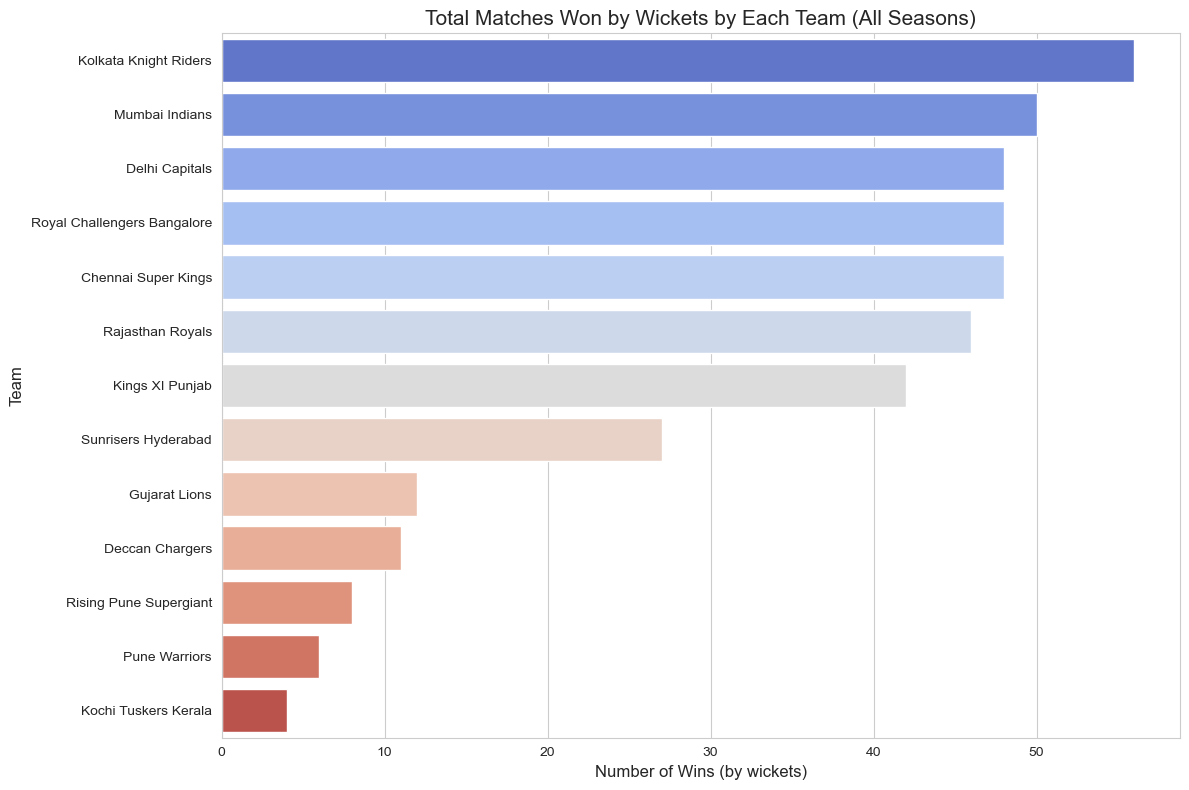

In [117]:
# 3. Visualization
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
sns.barplot(data=team_wickets_wins, x='count_of_wins_by_wickets', y='team', palette='coolwarm')

plt.title('Total Matches Won by Wickets by Each Team (All Seasons)', fontsize=15)
plt.xlabel('Number of Wins (by wickets)', fontsize=12)
plt.ylabel('Team', fontsize=12)
plt.tight_layout()
plt.show()

**Top 10 Players of the Match**

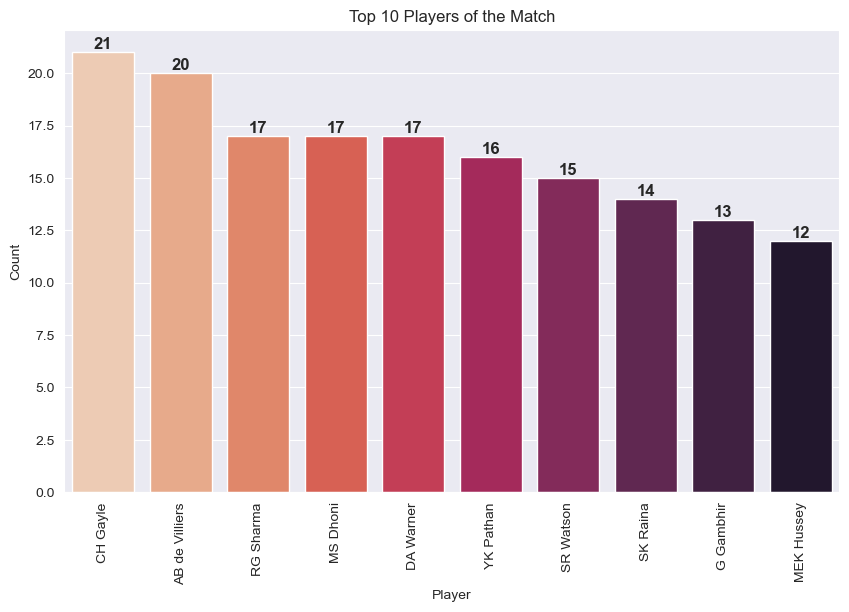

In [120]:
plt.figure(figsize=(10, 6))
sns.set_style(style='darkgrid')
top_players = ipl_matches_copy['player_of_match'].value_counts().head(10)
bars=sns.barplot(x=top_players.index, y=top_players.values, palette='rocket_r')

plt.xticks(rotation=90)
# Adding labels for x and y axes
plt.xlabel('Player')
plt.ylabel('Count')
plt.title('Top 10 Players of the Match')

for bar in bars.patches:
    height=bar.get_height()
    plt.text(
        bar.get_x()+bar.get_width()/2,  #x
        height,                         #y
        f'{int(height):,}',             #s
        ha='center',va='bottom', fontweight='bold',fontsize=12
    )

plt.show()

In [121]:
ipl_matches_copy.columns

Index(['id', 'Season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'year'],
      dtype='object')

In [124]:
#Feature Engineering
#Assigning 1 and 0 for winning teams, 1 for team1 adn 0 if team2 won
ipl_matches_copy['winner_team'] = (ipl_matches_copy['winner'] == ipl_matches_copy['team1']).astype(int)

In [126]:
ipl_matches_copy.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,year,winner_team
0,1,IPL-2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,2017,1
1,2,IPL-2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,2017,0
2,3,IPL-2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,2017,0
3,4,IPL-2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,2017,0
4,5,IPL-2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,AK Chaudhary,C Shamshuddin,2017,1


## Data Preprocessing

In [129]:
ipl_matches_copy.shape

(756, 19)

In [131]:
ipl_matches_copy.dtypes

id                          int64
Season                     object
city                       object
date               datetime64[ns]
team1                      object
team2                      object
toss_winner                object
toss_decision              object
result                     object
dl_applied                  int64
winner                     object
win_by_runs                 int64
win_by_wickets              int64
player_of_match            object
venue                      object
umpire1                    object
umpire2                    object
year                        int32
winner_team                 int32
dtype: object

In [133]:
ipl_matches_copy.columns

Index(['id', 'Season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'year', 'winner_team'],
      dtype='object')

## Modeling

In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from xgboost import XGBClassifier 
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

# Load the dataset
df = pd.read_csv('ipl_matches.csv')

# Preprocessing
df = df.dropna(subset=['winner'])
team_mapping = {'Rising Pune Supergiant': 'Rising Pune Supergiants', 'Delhi Daredevils': 'Delhi Capitals'}
df['team1'] = df['team1'].replace(team_mapping)
df['team2'] = df['team2'].replace(team_mapping)
df['toss_winner'] = df['toss_winner'].replace(team_mapping)
df['winner'] = df['winner'].replace(team_mapping)

df['team1_win'] = (df['winner'] == df['team1']).astype(int)
features = ['team1', 'team2', 'toss_winner', 'toss_decision', 'city', 'venue']
X = df[features].copy()
X['city'] = X['city'].fillna('Unknown')
y = df['team1_win']

# One-Hot Encoding pipeline
categorical_features = ['team1', 'team2', 'toss_winner', 'toss_decision', 'city', 'venue']
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(probability=True),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XG Boosting": XGBClassifier(n_jobs = -1)
}

results = []
for name, model in models.items():
    clf = Pipeline(steps=[('preprocessor', preprocessor),
                          ('classifier', model)])
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred)
    })

results_df = pd.DataFrame(results)

print(results_df)

                 Model  Accuracy  Precision    Recall  F1-Score
0  Logistic Regression  0.529801   0.480000  0.347826  0.403361
1                  SVM  0.602649   0.604651  0.376812  0.464286
2                  KNN  0.569536   0.535714  0.434783  0.480000
3        Decision Tree  0.523179   0.474576  0.405797  0.437500
4        Random Forest  0.536424   0.491228  0.405797  0.444444
5          XG Boosting  0.536424   0.491228  0.405797  0.444444


## Hyperparameter Tuning

In [141]:
from sklearn.model_selection import GridSearchCV

# Tuning Logistic Regression
lr_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', LogisticRegression(max_iter=5000))])

lr_param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l1', 'l2'],
    'classifier__solver': ['liblinear']
}

lr_grid = GridSearchCV(lr_pipeline, lr_param_grid, cv=5, scoring='accuracy')
lr_grid.fit(X_train, y_train)

print("Logistic Regression")
print(f"Best Logistic Regression Params: {lr_grid.best_params_}")
print(f"Best Logistic Regression Cross-Validation Accuracy: {lr_grid.best_score_:.4f}")

# Tuning SVM
svm_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                ('classifier', SVC(probability=True))])

svm_param_grid = {
    'classifier__C': [0.1, 1, 10],
    'classifier__kernel': ['linear', 'rbf'],
    'classifier__gamma': ['scale', 'auto']
}

svm_grid = GridSearchCV(svm_pipeline, svm_param_grid, cv=5, scoring='accuracy')
svm_grid.fit(X_train, y_train)
print("\n")
print("Support Vector Machine (SVM)")
print(f"Best SVM Params: {svm_grid.best_params_}")
print(f"Best SVM Cross-Validation Accuracy: {svm_grid.best_score_:.4f}")

Logistic Regression
Best Logistic Regression Params: {'classifier__C': 100, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}
Best Logistic Regression Cross-Validation Accuracy: 0.5807


Support Vector Machine (SVM)
Best SVM Params: {'classifier__C': 1, 'classifier__gamma': 'scale', 'classifier__kernel': 'linear'}
Best SVM Cross-Validation Accuracy: 0.5707
